In [45]:
import numpy as nd
import pandas as pd

In [46]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [47]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4068,ham,Hope youåÕre not having too much fun without m...,NaN,NaN,NaN
190,spam,Are you unique enough? Find out from 30th Augu...,NaN,NaN,NaN
4041,ham,What time do u get out?,NaN,NaN,NaN
4054,ham,When is school starting. Where will you stay. ...,NaN,NaN,NaN
3685,ham,I get out of class in bsn in like &lt;#&gt; ...,NaN,NaN,NaN
2341,ham,Tell dear what happen to you. Why you talking ...,NaN,NaN,NaN
3676,ham,Great! So what attracts you to the brothas?,NaN,NaN,NaN
1466,ham,Your account has been refilled successfully by...,NaN,NaN,NaN
700,ham,How much r Ì_ willing to pay?,NaN,NaN,NaN
2650,ham,Do you like shaking your booty on the dance fl...,NaN,NaN,NaN


In [48]:
df = pd.read_csv('spam.csv')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [8]:
df.shape()

TypeError: 'tuple' object is not callable

In [49]:
print(df.shape)

(5572, 5)


In [22]:
#1.Data Cleaning
#2.Explorative Data Anylysis
#3.Text Preprocessing
#4.Model Bulding
#5.Evaluation
#6.Improvement
#7.website

In [50]:
#Data cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [65]:
#Drop the last 3 coumns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

KeyError: "['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] not found in axis"

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int32 
 1   text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


In [67]:
df.sample(5)

,target,text
4998,0,"Hmph. Go head, big baller."
2924,0,Are you coming to day for class.
391,0,Hey so this sat are we going for the intro pil...
2237,0,"Give her something to drink, if she takes it a..."
1214,0,I'll text now! All creepy like so he won't thi...


In [68]:
df.rename(columns={'v1':'target' ,'v2':'text'},inplace=True)
df.sample(5)# renaming the column target and text

,target,text
3598,0,Then wat r u doing now? Busy wif work?
3956,0,Where is that one day training:-)
3781,0,How r Ì_ going to send it to me?
1194,0,Ok... C ya...
5394,0,I dont know exactly could you ask chechi.


In [69]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [70]:
#encoder.fit_transform(df['target'])# ham is assign as 0 and span is assign as 1

df['target'] = encoder.fit_transform(df['target'])

In [57]:
df.sample(5)

,target,text
5476,0,Yes princess! I want to please you every night...
4798,0,I dont know why she.s not getting your messages
4453,0,I'm home. Ard wat time will u reach?
1063,1,We have new local dates in your area - Lots of...
359,0,"Hello! Just got here, st andrews-boy its a lon..."


In [71]:
#check missing value

df.isnull().sum() # target =0 and text =0 it means there has no missing value

target    0
text      0
dtype: int64

In [72]:
# check duplicate value

df.duplicated().sum()# here is 403 duplicate value

0

In [73]:
# Now remove the duplicate value

df = df.drop_duplicates(keep='first')

In [74]:
df.duplicated().sum() # Now no duplicate value is present

0

In [75]:
print(df.shape)

(5169, 2)


In [43]:
#Eda

In [76]:
#check how much data is ham and how much data is spam

df['target'].value_counts() # ham 4516 spam 653

0    4516
1     653
Name: target, dtype: int64

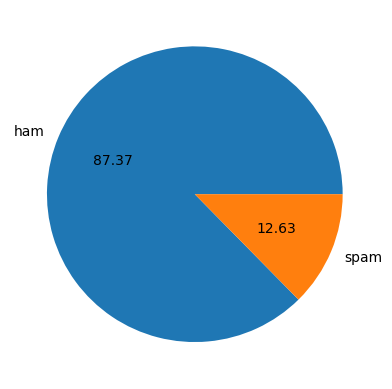

In [77]:
import matplotlib.pyplot as plt# plot representation of df['target'].value_counts() part

plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

plt.show()

In [48]:
#data is imbalance

In [78]:
!pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [55]:
nltk.data.path.append("/path/to/extracted/punkt/")

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [27]:
df['text'].apply(len)# get the length of the text part of the data set

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [79]:
df['num_characters']=df['text'].apply(len)

In [80]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [81]:
df['text'].apply(lambda x:nltk.word_tokenize(x))# split the entire text message with respect to word

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [82]:
#count the number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [83]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [84]:
df['text'].apply(lambda x:nltk.sent_tokenize(x)) # split the entire text message with respect to sentence

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [85]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [86]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [87]:
df[['num_characters','num_words','num_sentence']].describe() # the entire mathematical record

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [88]:
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()# all math records of ham

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [89]:
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()#All math recors of spam

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [39]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

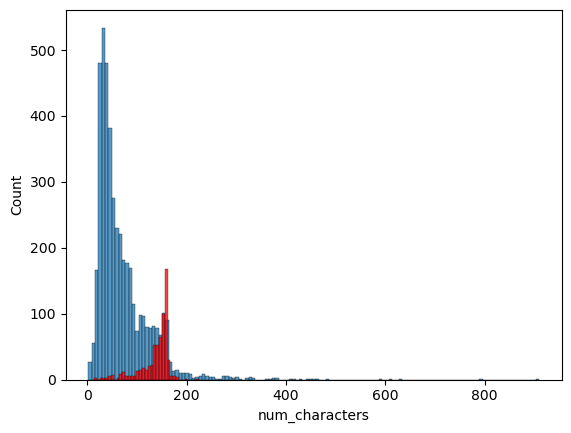

In [90]:
sns.histplot(df[df['target']==0]['num_characters'])# ploting the histogram just for the ham value=0
sns.histplot(df[df['target']==1]['num_characters'],color='red')# for spam value =1

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

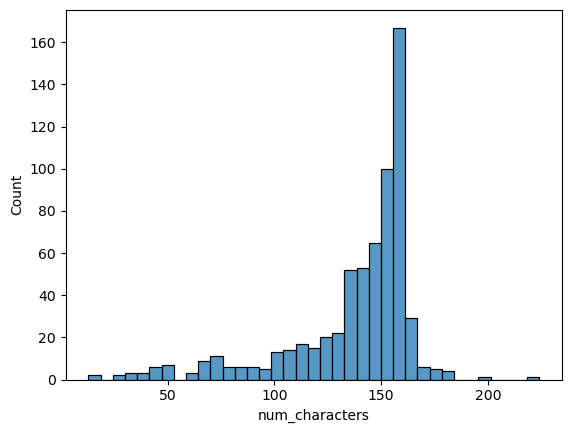

In [91]:
sns.histplot(df[df['target']==1]['num_characters'])# for spam value =1

<AxesSubplot:xlabel='num_words', ylabel='Count'>

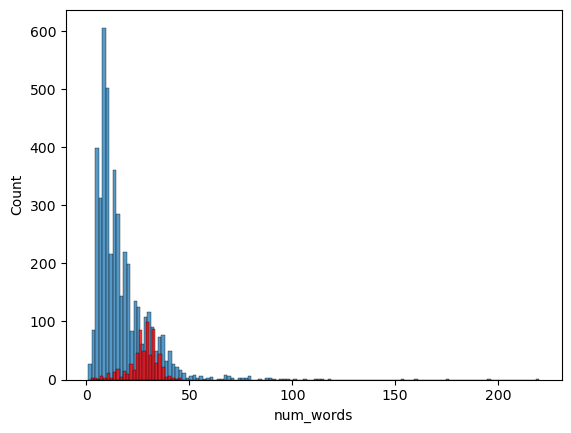

In [92]:
sns.histplot(df[df['target']==0]['num_words'])# ploting the histogram just for num of words the ham value=0
sns.histplot(df[df['target']==1]['num_words'],color='red')# for spam value =1

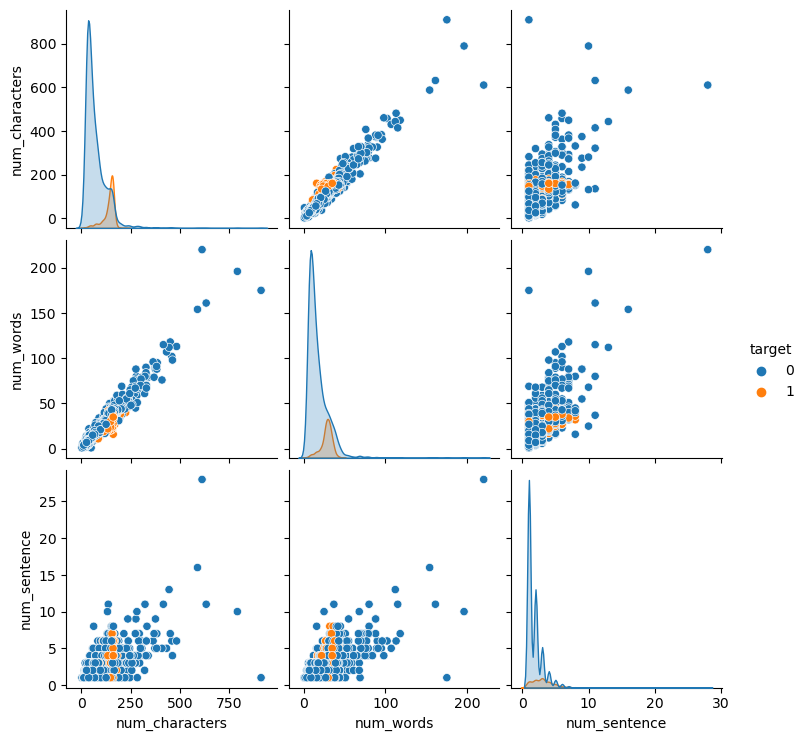

In [93]:
sns.pairplot(df,hue='target')

In [94]:
#calculating the corelation,It is basically use to represent the linear relatioship between two or more variable

df.corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentence,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

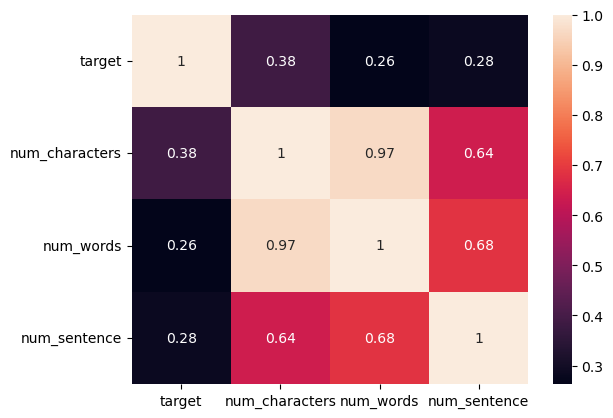

In [95]:
sns.heatmap(df.corr(),annot=True) # heatmap of co-relation

In [81]:
#Data Preprocessing(Lowercase,Tokenization,Remove special character,removing stop word and puntuation , stemming)

In [96]:
import string
from stemming.porter2 import stem  # Import the stem function

def transform_text(text):
    text = text.lower()  # Convert text to lowercase
    text = text.split()  # Split the text into words

    # Define your custom list of words to exclude
    custom_stopwords = [
        "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
        "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her",
        "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs",
        "themselves", "what", "which", "who", "whom", "this", "that", "these", "those",
        "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had",
        "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if",
        "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
        "against", "between", "into", "through", "during", "before", "after", "above",
        "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
        "again", "further", "then", "once", "here", "there", "when", "where", "why",
        "how", "all", "any", "both", "each", "few", "more", "most", "other", "some",
        "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very",
        "s", "t", "can", "will", "just", "don", "should", "now", "d", "ll", "m", "o", "re",
        "ve", "y", "ain", "aren", "couldn", "didn", "doesn", "hadn", "hasn", "haven", "isn",
        "ma", "mightn", "mustn", "needn", "shan", "shouldn", "wasn", "weren", "won", "wouldn"
    ]

    y = []
    for word in text:
        # Apply stemming to the word
        stemmed_word = stem(word)

        if stemmed_word.isalnum() and stemmed_word not in string.punctuation and stemmed_word not in custom_stopwords:
            y.append(stemmed_word)

    return " ".join(y)




In [97]:
transform_text("I love the Yt lectures on Ml ,How about You?")

'love yt lectur ml'

In [98]:
df['transformed_text']=df['text'].apply(transform_text)

In [99]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong avail onli bugi n great world la e c...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe live around though


In [100]:
from wordcloud import WordCloud

In [147]:
!pip install wordcloud


     -------------------------------------- 153.3/153.3 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
from wordcloud import WordCloud
wc = WordCloud(width=500 , height=500 , min_font_size=10,background_color='white')

In [102]:
spam_wc =wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" ")) #word cloud for spam_word

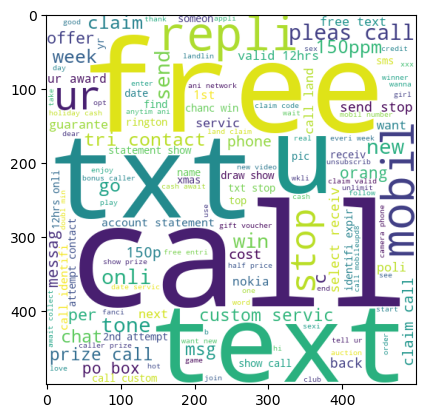

In [153]:
plt.imshow(spam_wc)

In [103]:
ham_wc =wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

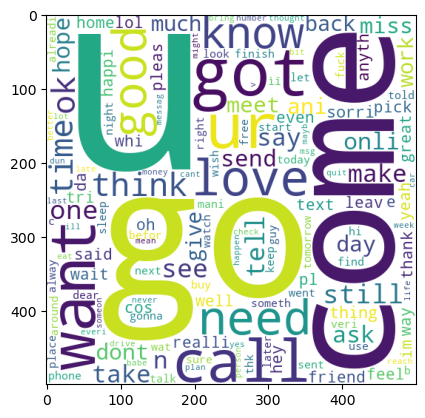

In [155]:
plt.imshow(ham_wc)

In [104]:
#Operation for getting the top 30 words
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [105]:
len(spam_corpus)

8308

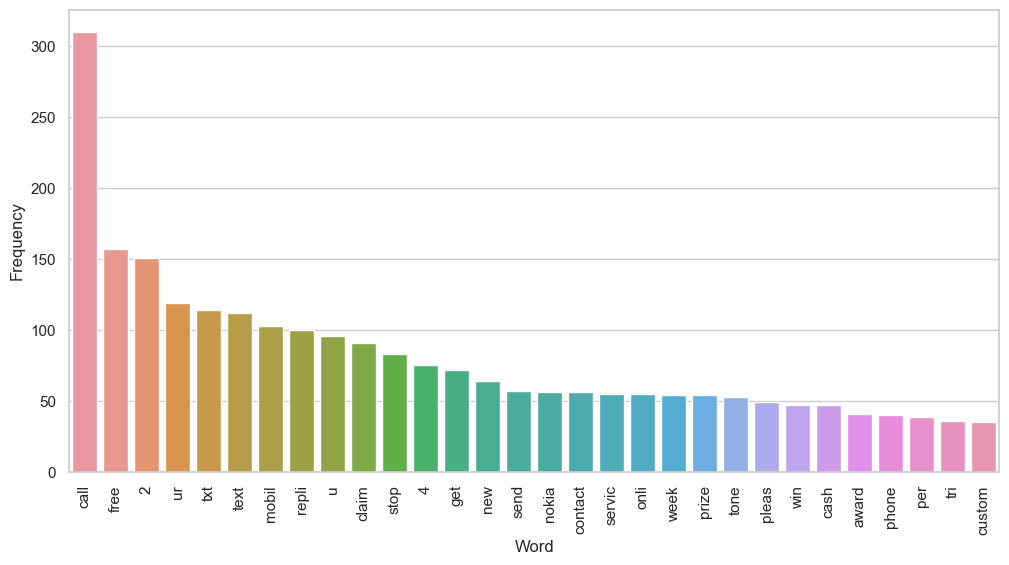

In [106]:
#most common 30 exact operation
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt  # Import Matplotlib for customization

# Assuming 'spam_corpus' is a list of text data
# Replace it with your actual data

# Calculate the most common items
common_items = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the common items
df_common_items = pd.DataFrame(common_items, columns=["Word", "Frequency"])

# Create a bar plot with vertical rotation of x-axis labels
sns.set(style="whitegrid")  # Set Seaborn style
plt.figure(figsize=(12, 6))  # Set figure size

# Create the bar plot
plot = sns.barplot(x="Word", y="Frequency", data=df_common_items)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)  # Rotate x-axis labels vertically

plt.show()  # Show the plot


In [107]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

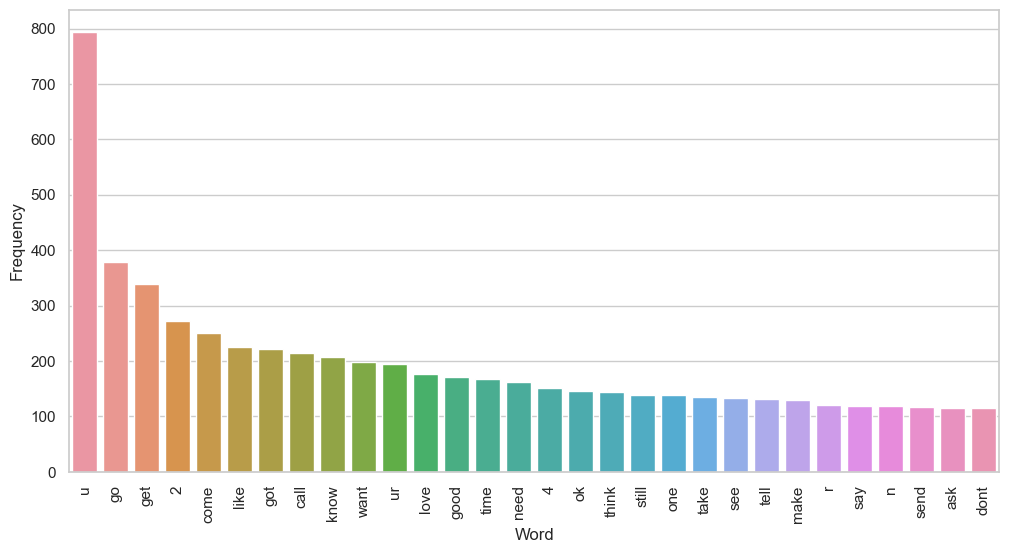

In [108]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt  # Import Matplotlib for customization

# Assuming 'spam_corpus' is a list of text data
# Replace it with your actual data

# Calculate the most common items
common_items = Counter(ham_corpus).most_common(30)

# Create a DataFrame from the common items
df_common_items = pd.DataFrame(common_items, columns=["Word", "Frequency"])

# Create a bar plot with vertical rotation of x-axis labels
sns.set(style="whitegrid")  # Set Seaborn style
plt.figure(figsize=(12, 6))  # Set figure size

# Create the bar plot
plot = sns.barplot(x="Word", y="Frequency", data=df_common_items)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)  # Rotate x-axis labels vertically

plt.show()  # Show the plot


In [110]:
#Model Building step Naive Baise


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()

tfidf = TfidfVectorizer(max_features=3000)


In [111]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [112]:
X #value from of target_text format

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [113]:
X.shape

(5169, 3000)

In [114]:
y = df['target'].values

In [115]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [116]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [117]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [118]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [119]:
gnb =GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB

In [120]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.7959381044487428
[[708 188]
 [ 23 115]]
0.3795379537953795


In [121]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9661508704061895
[[896   0]
 [ 35 103]]
1.0


In [122]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Assuming you have already split your data into x_train, y_train, x_test, y_test

bnb = BernoulliNB()
bnb.fit(x_train, y_train)  # Fit the model with training data

# Make predictions
y_pred3 = bnb.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision (you need to specify 'average' parameter)
precision = precision_score(y_test, y_pred3, average='weighted')
print("Precision:", precision)


Accuracy: 0.97678916827853
Confusion Matrix:
[[895   1]
 [ 23 115]]
Precision: 0.977138823099291


In [222]:
# tfidf --> MNB

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [224]:
!pip install xgboost




     ---------------------------------------- 99.7/99.7 MB 1.6 MB/s eta 0:00:00




[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [124]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [125]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [229]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [230]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [126]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [127]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9671179883945842, 0.9333333333333333)

In [128]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.902321083172147
Precision -  0.9743589743589743
For  NB
Accuracy -  0.9661508704061895
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8349514563106796
For  LR
Accuracy -  0.9516441005802708
Precision -  0.9150943396226415
For  RF
Accuracy -  0.9680851063829787
Precision -  0.981651376146789
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9526112185686654
Precision -  0.8449612403100775
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  GBDT
Accuracy -  0.9448742746615088
Precision -  0.9090909090909091
For  xgb
Accuracy -  0.9661508704061895
Precision -  0.9478260869565217


In [129]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [238]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.903288,1.000000
5,RF,0.962282,0.971429
4,LR,0.970019,0.965217
10,xgb,0.968085,0.964602
8,ETC,0.969052,0.956897
6,AdaBoost,0.955513,0.933962
9,GBDT,0.941973,0.933333
3,DT,0.924565,0.875000
7,BgC,0.956480,0.866142
2,NB,0.965184,0.864286


In [239]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [240]:

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.903288
1,RF,Accuracy,0.962282
2,LR,Accuracy,0.970019
3,xgb,Accuracy,0.968085
4,ETC,Accuracy,0.969052
5,AdaBoost,Accuracy,0.955513
6,GBDT,Accuracy,0.941973
7,DT,Accuracy,0.924565
8,BgC,Accuracy,0.956480
9,NB,Accuracy,0.965184


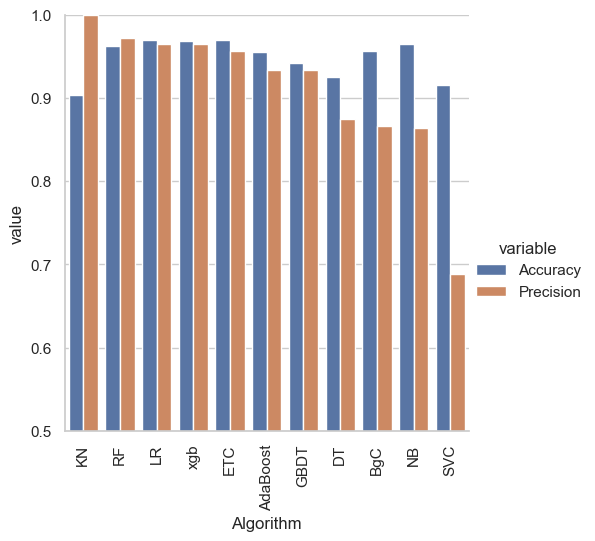

In [241]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [242]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [243]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [244]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [245]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [246]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [247]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.903288,1.000000,0.903288,1.000000,0.903288,1.000000,0.903288,1.000000
1,RF,0.962282,0.971429,0.962282,0.971429,0.962282,0.971429,0.962282,0.971429
2,LR,0.970019,0.965217,0.970019,0.965217,0.970019,0.965217,0.970019,0.965217
3,xgb,0.968085,0.964602,0.968085,0.964602,0.968085,0.964602,0.968085,0.964602
4,ETC,0.969052,0.956897,0.969052,0.956897,0.969052,0.956897,0.969052,0.956897
5,AdaBoost,0.955513,0.933962,0.955513,0.933962,0.955513,0.933962,0.955513,0.933962
6,GBDT,0.941973,0.933333,0.941973,0.933333,0.941973,0.933333,0.941973,0.933333
7,DT,0.924565,0.875000,0.924565,0.875000,0.924565,0.875000,0.924565,0.875000
8,BgC,0.956480,0.866142,0.956480,0.866142,0.956480,0.866142,0.956480,0.866142
9,NB,0.965184,0.864286,0.965184,0.864286,0.965184,0.864286,0.965184,0.864286


In [259]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [261]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [262]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [263]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748549323017408
Precision 0.9590163934426229


In [264]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [265]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(x_train,y_train)

In [ ]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [130]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))